# Tarea 5: Series de tiempo 

Mytzi Yael Munguía Cuatlayotl

201931063

**1. Genera secuencias x para entrenamiento (50%), validación (25%) y prueba (25%) de 120 elementos de longitud a partir**
**de los datos de temperatura.**

Importamos las librerias 

In [8]:
import tensorflow as tf
import keras as keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

Leemos el archivo CSV

In [9]:
df = pd.read_csv("C:/Users/mytzi/Downloads/jena_climate_2009_2016_.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


Imprimimos los encabezados y separamos los datos del encabezado

In [15]:
df= os.path.join("C:/Users/mytzi/Downloads/jena_climate_2009_2016_.csv")
with open(df) as df:
   data = df.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


Separamos datos de temperatura y los demás

In [17]:
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1]
  raw_data[i, :] = values[:]

Graficamos la serie de tiempo de temperaturas

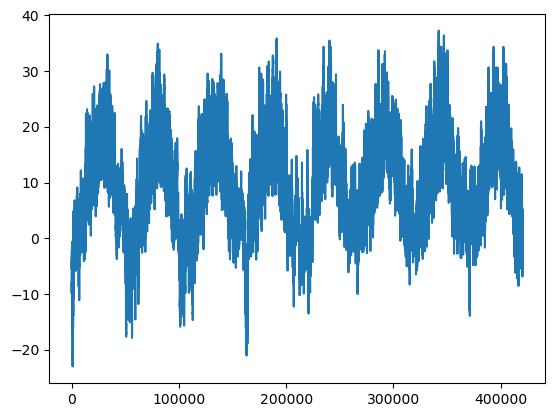

In [18]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

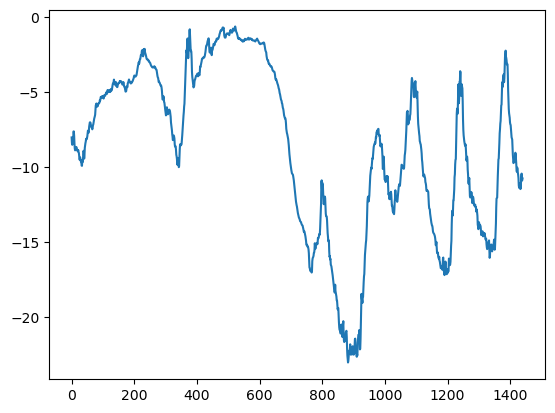

In [19]:
plt.plot(range(1440), temperature[:1440])

Establecemos la longitud deseada de las secuencias, en este caso es de 120 (longitud de los datos de temperatura), y las divisiones.

In [57]:
seq_length = 120

Definimos los tamaños de los conjuntos de entrenamiento (50%), validación (25%) y prueba (25%).

In [58]:
num_spl = len(temperature) - seq_length + 1
train_spl = int(0.5 * num_spl)
val_spl = int(0.25 * num_spl)
test_spl = num_spl - train_spl - val_spl

Para solucionar el error que nos arrojó

**"ValueError: `end_index` must be lower than the length of the data. Received: end_index=420332, for data of length 420331"**

definimos bien los índices finales para start_index y end_index.

In [69]:
start_index = 0
end_index = len(temperature) - 1
end_index_tra = start_index + train_spl
end_index_t = min(end_index_t, end_index)
end_index_val = end_index_t + val_spl
end_index_v=min(end_index_val, end_index)     

Generamos un conjunto de secuencias a partir del codigo proporcionado para la tarea

In [73]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    data=temperature,
    targets=temperature,
    sampling_rate = 1,
    sequence_length=seq_length,
    batch_size=30,
    shuffle=True,
    start_index=start_index,
    end_index=end_index_t
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    data=temperature,
    targets=temperature,
    sampling_rate = 1
    sequence_length=seq_length,
    batch_size=30,
    shuffle=True,
    start_index=end_index_t,
    end_index=end_index_v,
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    data=temperature,
    targets=temperature,
    sequence_length=seq_length,
    batch_size=30,
    shuffle=True,
    start_index=val_end_index,
    end_index=end_index
)


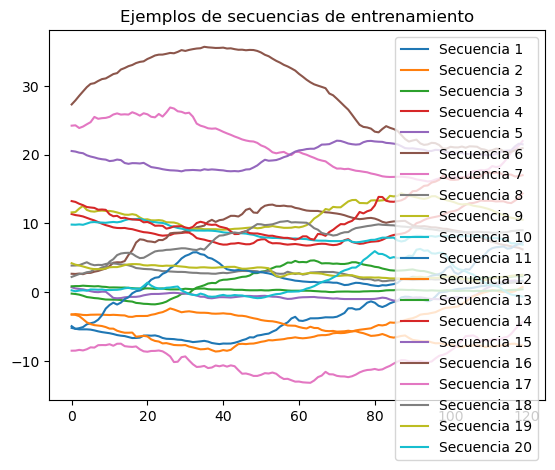

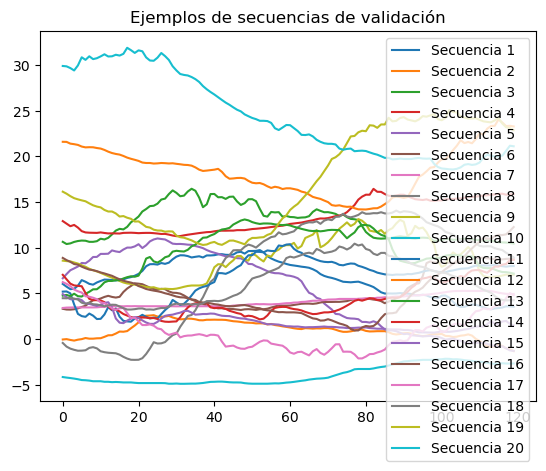

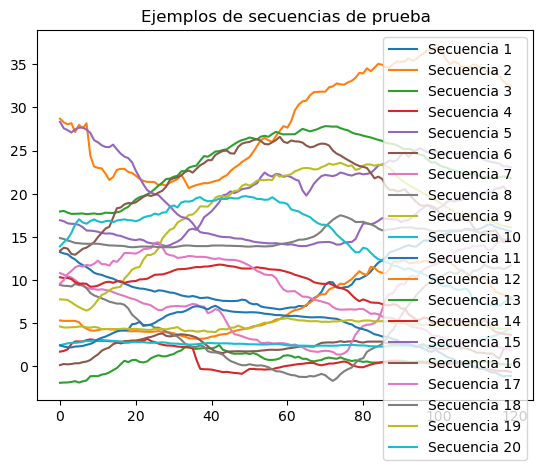

In [74]:
# Itera a través del conjunto de entrenamiento y muestra algunas secuencias
for batch in train_dataset:
    sequences, targets = batch
    # El número de secuencias en cada lote es igual al tamaño de lote (batch_size)
    for i in range(batch_size):
        plt.plot(sequences[i], label=f'Secuencia {i+1}')
    plt.title('Ejemplos de secuencias de entrenamiento')
    plt.legend()
    plt.show()
    break  # Para mostrar solo el primer lote


# Itera a través del conjunto de validación y muestra algunas secuencias
for batch in val_dataset:
    sequences, targets = batch
    # El número de secuencias en cada lote es igual al tamaño de lote (batch_size)
    for i in range(batch_size):
        plt.plot(sequences[i], label=f'Secuencia {i+1}')
    plt.title('Ejemplos de secuencias de validación')
    plt.legend()
    plt.show()
    break  # Para mostrar solo el primer lote


# Itera a través del conjunto de prueba y muestra algunas secuencias
for batch in test_dataset:
    sequences, targets = batch
    # El número de secuencias en cada lote es igual al tamaño de lote (batch_size)
    for i in range(batch_size):
        plt.plot(sequences[i], label=f'Secuencia {i+1}')
    plt.title('Ejemplos de secuencias de prueba')
    plt.legend()
    plt.show()
    break  # Para mostrar solo el primer lote